In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics
import json
import pathlib

# CheXpert Gender Model Validation on JSRT Dataset

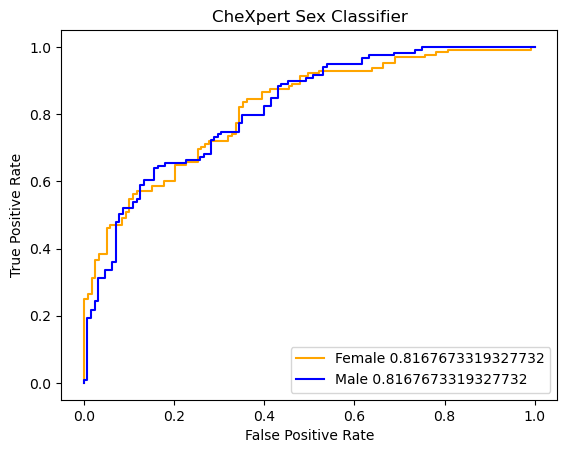

In [ ]:
base_jpg_path = r'D:\JSRT_Kaggle'
test_df = pd.read_csv(os.path.join(base_jpg_path, "jsrt_metadata.csv"))
pathlib.PosixPath = pathlib.WindowsPath
test_df['path']= r'images\images/' + test_df['study_id']
sex_model = load_learner(r"C:\Users\pree1\Downloads\chexpert_gender.pkl") # replace
test_path = r'D:\JSRT_Kaggle'

# Create a DataLoader for the test set
dls_test = ImageDataLoaders.from_df(
    test_df,
    test_path,
    fn_col='path',
    label_col='gender',  # or any other label column if available, otherwise you can use 'is_valid=False' to indicate no labels
    valid_pct=0.0,       # No validation split as this is the test set
    num_workers=4,
    device=torch.device('cuda'),
    item_tfms=Resize(224),
    bs=32
)
test_dl = dls_test.test_dl(test_df, with_labels=True)
sex_model.dls = dls_test

sex_model.dls = dls_test
sex_model.dls.to(device='cuda')
sex_model.model.to(device='cuda')
sex_test_dl = sex_model.dls.test_dl(test_df)
sex_preds = sex_model.get_preds(dl=sex_test_dl, with_decoded=True)


predict_df = test_df
predict_df['Gender_Tensor_Id'] =sex_preds[2].numpy()
predict_df['Gender_Probability'] =sex_preds[0].numpy().tolist()
predict_df.to_csv('chexpert_gender_jsrt_test.csv', index=False)

fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['gender'],y_score = [prob[0] for prob in predict_df['Gender_Probability']], pos_label = 'Female')
plt.plot(fpr,tpr, color='orange', label='Female ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['gender'],y_score = [prob[1] for prob in predict_df['Gender_Probability']], pos_label = 'Male')
plt.plot(fpr,tpr, color='blue', label='Male ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('CheXpert Sex Classifier')
plt.legend(loc=4)
plt.show()

# MIMIC Gender Model Validation on JSRT Dataset

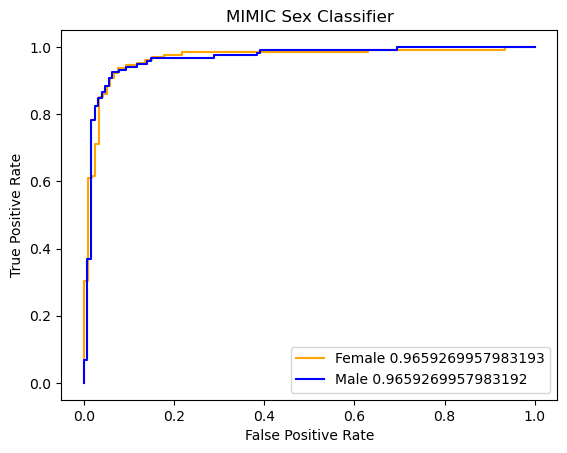

In [ ]:
base_jpg_path = r'D:\JSRT_Kaggle'
test_df = pd.read_csv(os.path.join(base_jpg_path, "jsrt_metadata.csv"))
pathlib.PosixPath = pathlib.WindowsPath
test_df['path']= r'images\images/' + test_df['study_id']
sex_model = load_learner(r"C:\Users\pree1\Downloads\mimic_gender.pkl") # replace
test_path = r'D:\JSRT_Kaggle'

# Create a DataLoader for the test set
dls_test = ImageDataLoaders.from_df(
    test_df,
    test_path,
    fn_col='path',
    label_col='gender',  # or any other label column if available, otherwise you can use 'is_valid=False' to indicate no labels
    valid_pct=0.0,       # No validation split as this is the test set
    num_workers=4,
    device=torch.device('cuda'),
    item_tfms=Resize(224),
    bs=32
)
test_dl = dls_test.test_dl(test_df, with_labels=True)
sex_model.dls = dls_test

sex_model.dls = dls_test
sex_model.dls.to(device='cuda')
sex_model.model.to(device='cuda')
sex_test_dl = sex_model.dls.test_dl(test_df)
sex_preds = sex_model.get_preds(dl=sex_test_dl, with_decoded=True)


predict_df = test_df
predict_df['Gender_Tensor_Id'] =sex_preds[2].numpy()
predict_df['Gender_Probability'] =sex_preds[0].numpy().tolist()
predict_df.to_csv('mimic_gender_jsrt_test.csv', index=False)

fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['gender'],y_score = [prob[0] for prob in predict_df['Gender_Probability']], pos_label = 'Female')
plt.plot(fpr,tpr, color='orange', label='Female ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['gender'],y_score = [prob[1] for prob in predict_df['Gender_Probability']], pos_label = 'Male')
plt.plot(fpr,tpr, color='blue', label='Male ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('MIMIC Sex Classifier')
plt.legend(loc=4)
plt.show()

# NIH Gender Model Validation on JSRT Dataset

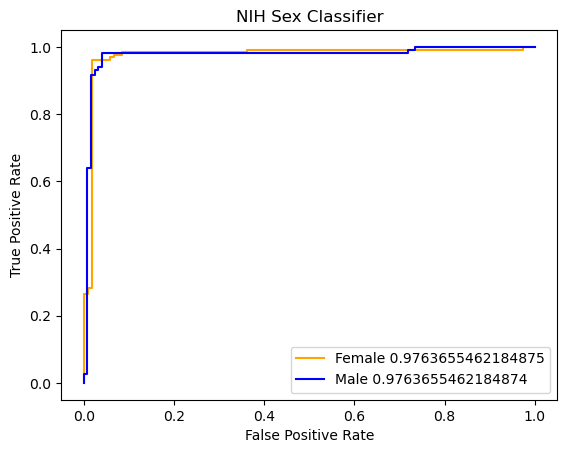

In [ ]:
base_jpg_path = r'D:\JSRT_Kaggle'
test_df = pd.read_csv(os.path.join(base_jpg_path, "jsrt_metadata.csv"))
pathlib.PosixPath = pathlib.WindowsPath
test_df['path']= r'images\images/' + test_df['study_id']
sex_model = load_learner(r"C:\Users\pree1\Downloads\nih_gender.pkl") # replace
test_path = r'D:\JSRT_Kaggle'

# Create a DataLoader for the test set
dls_test = ImageDataLoaders.from_df(
    test_df,
    test_path,
    fn_col='path',
    label_col='gender',  # or any other label column if available, otherwise you can use 'is_valid=False' to indicate no labels
    valid_pct=0.0,       # No validation split as this is the test set
    num_workers=4,
    device=torch.device('cuda'),
    item_tfms=Resize(224),
    bs=32
)
test_dl = dls_test.test_dl(test_df, with_labels=True)
sex_model.dls = dls_test

sex_model.dls = dls_test
sex_model.dls.to(device='cuda')
sex_model.model.to(device='cuda')
sex_test_dl = sex_model.dls.test_dl(test_df)
sex_preds = sex_model.get_preds(dl=sex_test_dl, with_decoded=True)


predict_df = test_df
predict_df['Gender_Tensor_Id'] =sex_preds[2].numpy()
predict_df['Gender_Probability'] =sex_preds[0].numpy().tolist()
predict_df.to_csv('nih_gender_jsrt_test.csv', index=False)

fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['gender'],y_score = [prob[0] for prob in predict_df['Gender_Probability']], pos_label = 'Female')
plt.plot(fpr,tpr, color='orange', label='Female ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['gender'],y_score = [prob[1] for prob in predict_df['Gender_Probability']], pos_label = 'Male')
plt.plot(fpr,tpr, color='blue', label='Male ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('NIH Sex Classifier')
plt.legend(loc=4)
plt.show()